# Part2. Feature Engineering and Data Cleaning
ref : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


## Load & Check data

In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

# Check basic information
display(data.head())
display(data.describe())
data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Check null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Fill null values

In [4]:
# Fill null values in Age (using mean of Name group)
data['Initial'] = data.Name.str.extract('([a-zA-z]+)\.').replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                                                                 ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'])
Age_by_Initial_dict = data.groupby('Initial').Age.mean().round().astype(int).to_dict()

data.loc[data.Age.isna(), 'Age'] = data.loc[data.Age.isna(), 'Initial'].map(lambda x : Age_by_Initial_dict[x])


# Check null values in Age
print( 'No of NaN in Age col :', data.Age.isna().sum() )

No of NaN in Age col : 0


In [5]:
# Fill null values in Embarked (using mode)
Embarked_mode = data.Embarked.mode()[0]
data.Embarked = data.Embarked.fillna( Embarked_mode )


# Check null values in Embarked
print( 'No of NaN in Embarked col :', data.Embarked.isna().sum() )

No of NaN in Embarked col : 0


## New Feature 1. Age_band
- **There is a problem with Continous features in certain types of Machine Learning Models.** We may need to convert these continous features into categorical ones by either Binning or Normalisation.
- The range of Age col is 0-80, and I will cut this feature into 5 bins using pandas.cut() method.

In [6]:
data['Age_band'] = pd.cut(data.Age, bins=5, labels=range(5))

# Check the result
display(data.head(2))
data.Age_band.value_counts().to_frame().style.background_gradient(cmap='summer_r')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


,Age_band
1,382
2,325
0,104
3,69
4,11


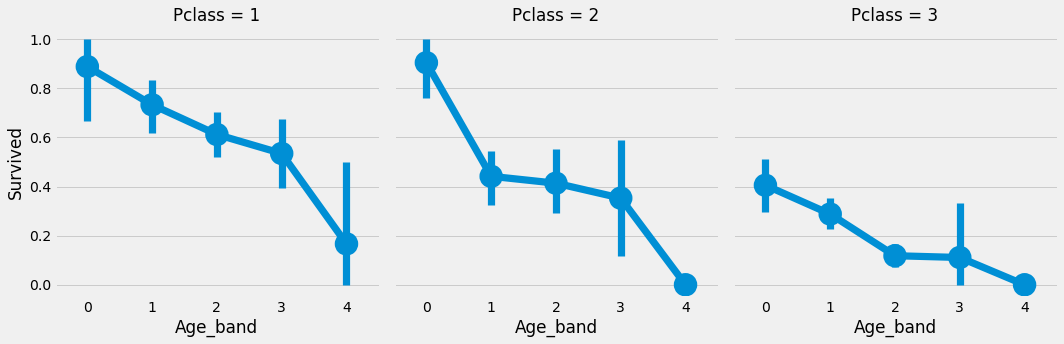

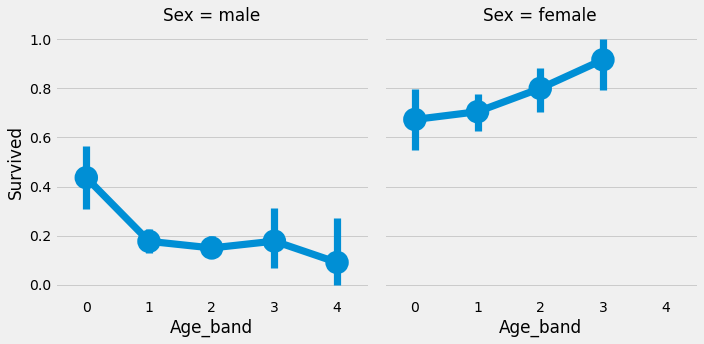

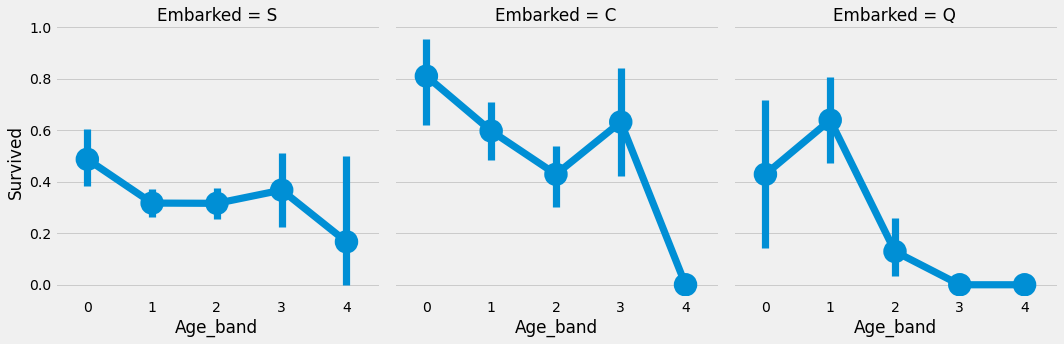

In [7]:
sns.catplot('Age_band', 'Survived', col='Pclass', data=data, kind='point')
plt.show()

sns.catplot('Age_band', 'Survived', col='Sex', data=data, kind='point')
plt.show()

sns.catplot('Age_band', 'Survived', col='Embarked', data=data, kind='point')
plt.show()

## New Feature 2. Family_size & Alone
- Family_size is the summation of SibSp and Parch. Alone is a binary value whether a passenger is alone or not.
- We can check whether the survival rate is related with family size of a passenger.

In [8]:
data['Family_size'] = data.SibSp + data.Parch
data['Alone'] = data.Family_size.map(lambda x : 1 if x == 0 else 0)

# Check the result
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0


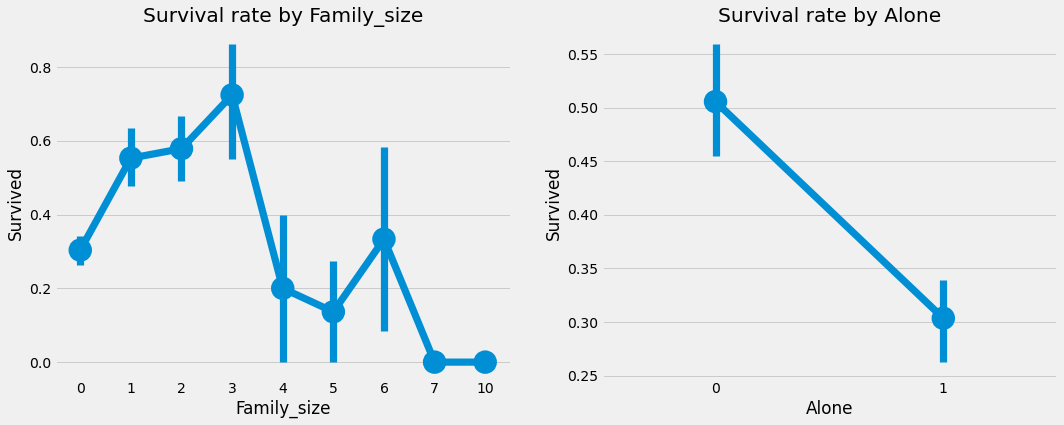

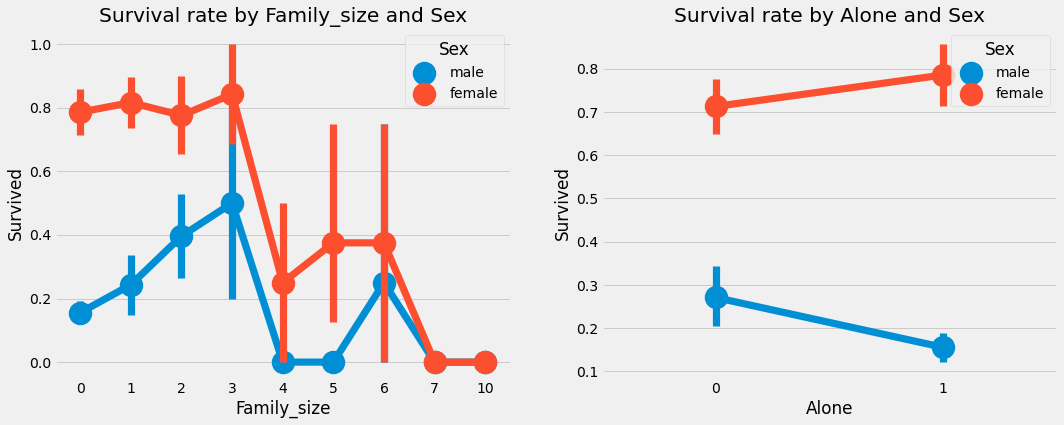

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for idx, col in enumerate(['Family_size', 'Alone']):
    sns.pointplot(col, 'Survived', data=data, ax=ax[idx])
    ax[idx].set_title(f'Survival rate by {col}')
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for idx, col in enumerate(['Family_size', 'Alone']):
    sns.pointplot(col, 'Survived', data=data, ax=ax[idx], hue='Sex')
    ax[idx].set_title(f'Survival rate by {col} and Sex')
plt.show()

- Alone males show low survival rate comparing to males with some family members. The reason might be that alone males onboard are mostly adults, while male children under 10, in which age passengers have much higher survival rate, are all with their family.
- Passengers with 1-3 family members are relatively more likely to survive. Alone female passengers also show high survival rate.

## New Feature 3. Fare_range
- Like Age feature, we also cut Fare feature, which is continuous feature, into 5 bins.
- This time, I will use pandas.qcut() method. Unlike cut() method, which keeps the range of each bin same, qcut() method keeps the number of records(data) in each bin same.

In [10]:
data['Fare_range'] = pd.qcut(data.Fare, 4, labels=range(4))

# Check the result
display(data.head(2))
data.Fare_range.value_counts().to_frame().style.background_gradient(cmap='summer_r')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone,Fare_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,3


,Fare_range
1,224
0,223
3,222
2,222


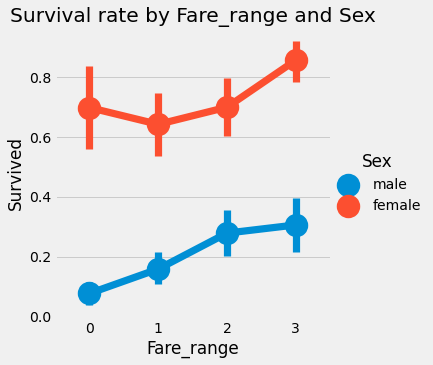

In [11]:
sns.catplot('Fare_range', 'Survived', data=data, hue='Sex', kind='point')
plt.title('Survival rate by Fare_range and Sex')
plt.show()

- Roughly speaking, the survival rate increases as the fare_range increases.
- However, it's interesting that female passengers in Fare_range 0 are more likely to survive than those in Fare_range 1. The survival rate of female passengers in Fare_range 0 is as high as that of female passengers in Fare_range 3(around 0.70).

## Convert String features into Numeric & Drop Unneeded Categorical features
- String features such as Sex, Embarked, Initial should be converted into numeric features to be passed to ML models.
- I will use replace() method for binary string features and get_dummies() method for other string features. (One-hot encoding)
- The original string features will be dropped.
- Several Categorical features that are unneeded for the modelling (PassengerId, Name, Ticket, Cabin, etc) will be also dropped.

In [12]:
data['Sex_male'] = data['Sex'].replace(['female', 'male'], [0, 1])
data = pd.concat([data, pd.get_dummies(data.Initial, prefix='Initial').iloc[:, :-1], 
                        pd.get_dummies(data.Embarked, prefix='Port').iloc[:, :-1]],
                  axis=1)
data = data.drop(columns=['Sex', 'Embarked', 'Initial'])

# Check the result
data.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Family_size,Alone,Fare_range,Sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Port_C,Port_Q
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,1,0,0,1,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,1,0,3,0,0,0,0,1,1,0


In [13]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Check the result
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_band,Family_size,Alone,Fare_range,Sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Port_C,Port_Q
0,0,3,22.0,1,0,7.2500,1,1,0,0,1,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,2,1,0,3,0,0,0,0,1,1,0
